In [62]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import pandas as pd

# Feature Engineering

## Feature Scores

In [2]:
feature_scores = [('#Favourites', 41),
                  ('#Followers', 12),
                  ('confidence_mean', 12),
                  ('usernamehash_col163', 10),
                  ('usernamehash_col139', 8),
                  ('sin_second', 8),
                  ('#Friends', 7),
                  ('usernamehash_col35', 6),
                  ('usernamehash_col185', 5),
                  ('usernamehash_col132', 4),
                  ('confidence_max', 4),
                  ('usernamehash_col182', 3),
                  ('usernamehash_col54', 3),
                  ('usernamehash_col174', 3),
                  ('usernamehash_col97', 3),
                  ('Sentiments1', 3),
                  ('usernamehash_col102', 2),
                  ('usernamehash_col50', 2),
                  ('usernamehash_col73', 2),
                  ('usernamehash_col56', 2),
                  ('Sentiments0', 1),
                  ('usernamehash_col105', 1),
                  ('usernamehash_col196', 1),
                  ('Hashtag_counts', 1),
                  ('usernamehash_col201', 1),
                  ('usernamehash_col215', 1)]

In [3]:
labels = [feat_score[0] for feat_score in feature_scores]
values = [feat_score[1] for feat_score in feature_scores]

In [58]:
font = {'size': 15}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = (10,10)

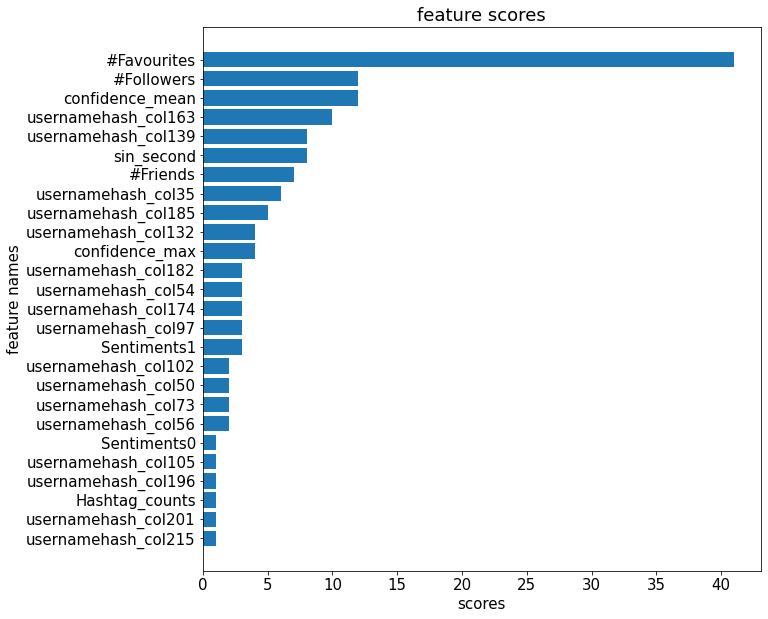

In [6]:
fig = plt.figure(figsize=(10,10))
plt.barh(labels,values)
plt.title("feature scores")
plt.xlabel("scores")
plt.ylabel("feature names")
plt.gca().invert_yaxis()
plt.show()

## Sample Decision Tree

In [48]:
sample_df = pd.read_feather("dataset/data_0.ftr")
org_cols = list(sample_df.columns)
org_cols.remove("Retweets")
org_cols

['usernamehash_col0',
 'usernamehash_col1',
 'usernamehash_col2',
 'usernamehash_col3',
 'usernamehash_col4',
 'usernamehash_col5',
 'usernamehash_col6',
 'usernamehash_col7',
 'usernamehash_col8',
 'usernamehash_col9',
 'usernamehash_col10',
 'usernamehash_col11',
 'usernamehash_col12',
 'usernamehash_col13',
 'usernamehash_col14',
 'usernamehash_col15',
 'usernamehash_col16',
 'usernamehash_col17',
 'usernamehash_col18',
 'usernamehash_col19',
 'usernamehash_col20',
 'usernamehash_col21',
 'usernamehash_col22',
 'usernamehash_col23',
 'usernamehash_col24',
 'usernamehash_col25',
 'usernamehash_col26',
 'usernamehash_col27',
 'usernamehash_col28',
 'usernamehash_col29',
 'usernamehash_col30',
 'usernamehash_col31',
 'usernamehash_col32',
 'usernamehash_col33',
 'usernamehash_col34',
 'usernamehash_col35',
 'usernamehash_col36',
 'usernamehash_col37',
 'usernamehash_col38',
 'usernamehash_col39',
 'usernamehash_col40',
 'usernamehash_col41',
 'usernamehash_col42',
 'usernamehash_col43'

In [49]:
output_ls = []

for i, feat in enumerate(org_cols):
  feat_type = "q"
  if feat.startswith("usernamehash_") or feat.startswith("Embeddings_") or feat.startswith("Mentionshash_") or feat.startswith("Hashtagshash_") or feat.startswith("URLshash_"):
    feat_type = "i"
  output_ls.append(f"{i}\t{feat}\t{feat_type}")

with open("feature_map.txt", "w") as f:
  f.write("\n".join(output_ls))

In [34]:
xgbr = xgb.Booster()
xgbr.load_model("saved_models/feat_eng_10eps.model")

In [35]:
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 80,50

<AxesSubplot:>

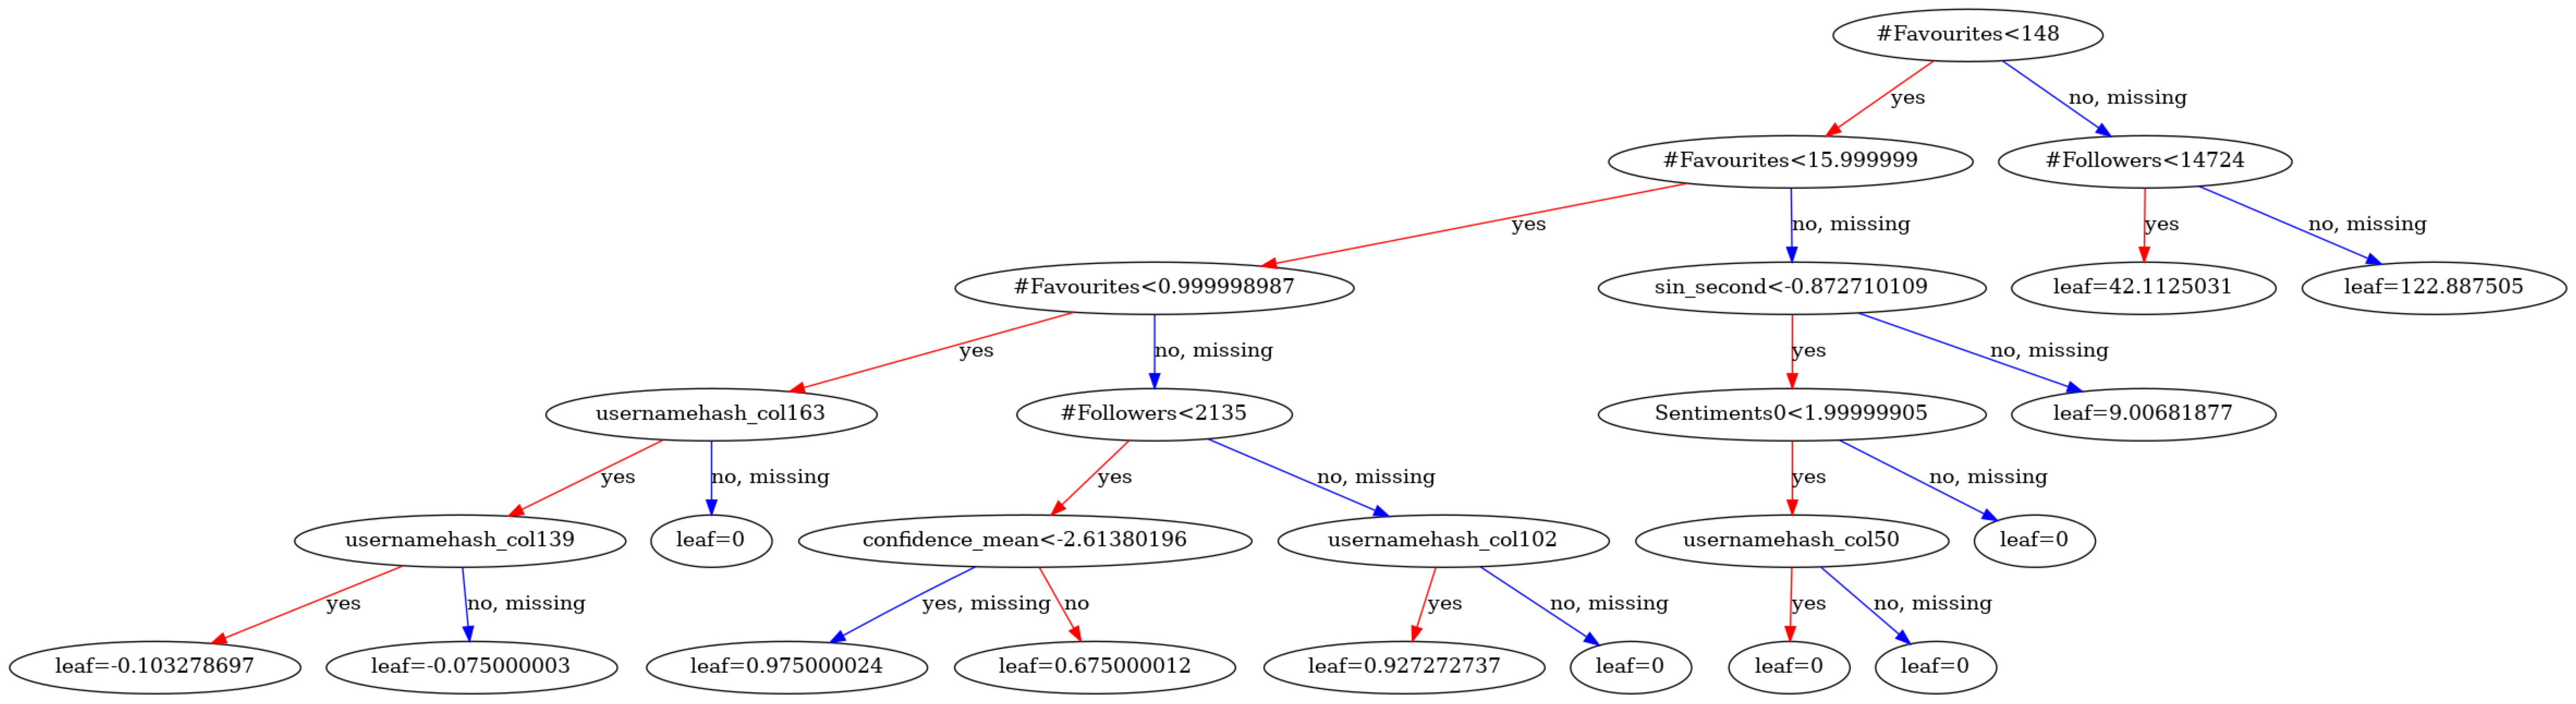

In [52]:
xgb.plot_tree(xgbr, fmap="feature_map_all_cols.txt")

# Training of Models

In [63]:
with open("stats_train.json") as f:
  stats_train = json.load(f)

In [78]:
label_map = {
  "model1a": "2 estimators",
  "model1b": "4 estimators",
  "model1c": "6 estimators",
  "model1d": "8 estimators",
  "model1e": "10 estimators",
}

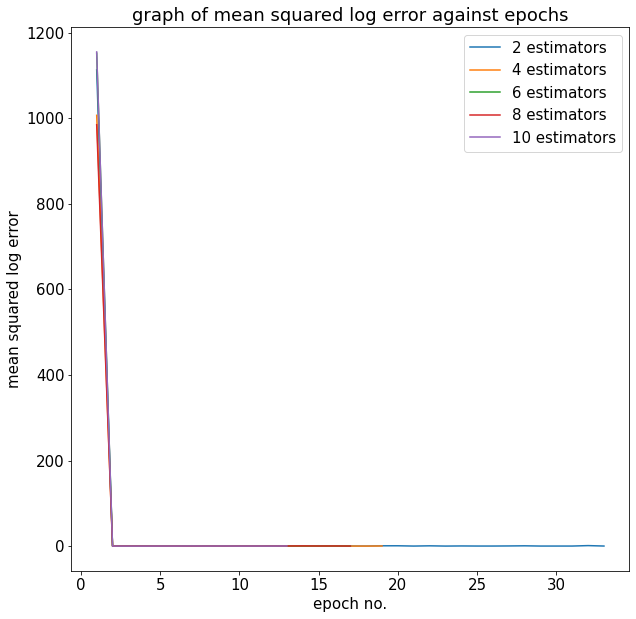

In [79]:
fig = plt.figure(figsize=(10,10))
for json_name, graph_label in label_map.items():
  values = [err for err in stats_train[json_name]]
  plt.plot([i for i in range(1, len(values)+1)], values, label=graph_label)
plt.title("graph of mean squared log error against epochs")
plt.xlabel("epoch no.")
plt.ylabel("mean squared log error")
plt.legend()
plt.show()

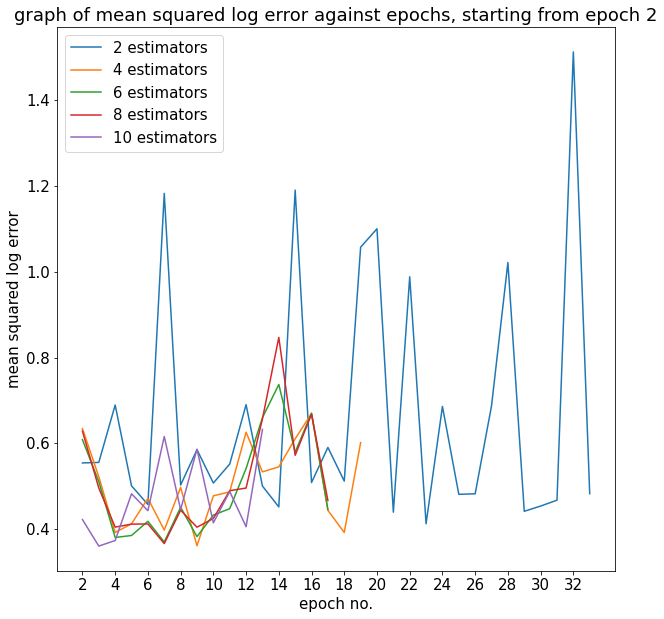

In [80]:
# plot stats starting from epoch 2 because epoch 1 throws the graph off
start_ep = 2
max_end_ep = 0
fig = plt.figure(figsize=(10,10))
for json_name, graph_label in label_map.items():
  values = [err for err in stats_train[json_name][1:]]
  plt.plot([i for i in range(start_ep, len(values)+start_ep)], values, label=graph_label)
  max_end_ep = max(max_end_ep, len(values)+start_ep)
plt.xticks(np.arange(start_ep, max_end_ep, 2))
plt.title("graph of mean squared log error against epochs, starting from epoch 2")
plt.xlabel("epoch no.")
plt.ylabel("mean squared log error")
plt.legend()
plt.show()

In [81]:
label_map = {
  "model1a": "w/o dropout",
  "model2": "w dropout",
}

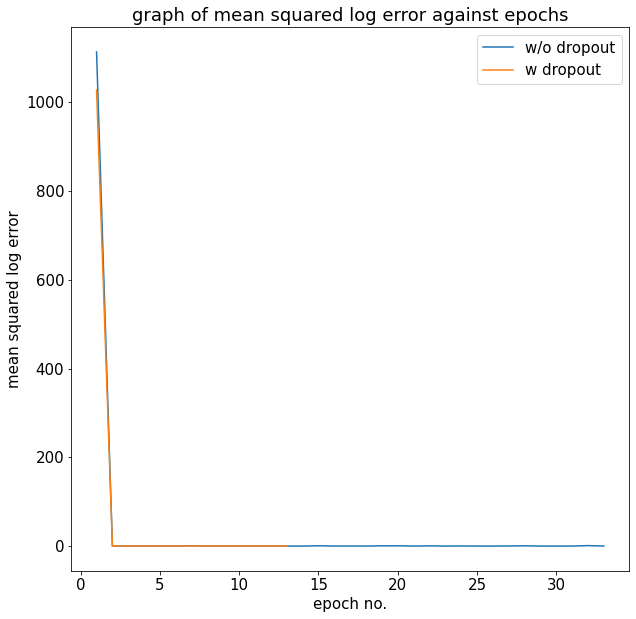

In [82]:
fig = plt.figure(figsize=(10,10))
for json_name, graph_label in label_map.items():
  values = [err for err in stats_train[json_name]]
  plt.plot([i for i in range(1, len(values)+1)], values, label=graph_label)
plt.title("graph of mean squared log error against epochs")
plt.xlabel("epoch no.")
plt.ylabel("mean squared log error")
plt.legend()
plt.show()

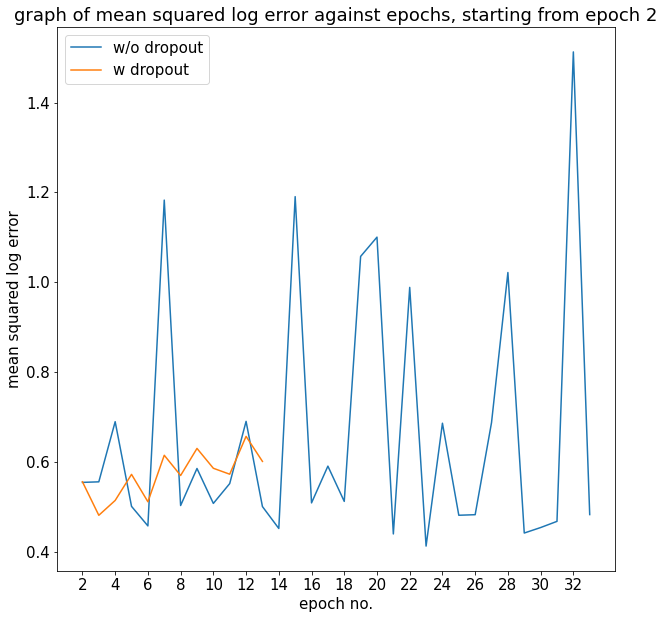

In [83]:
# plot stats starting from epoch 2 because epoch 1 throws the graph off
start_ep = 2
max_end_ep = 0
fig = plt.figure(figsize=(10,10))
for json_name, graph_label in label_map.items():
  values = [err for err in stats_train[json_name][1:]]
  plt.plot([i for i in range(start_ep, len(values)+start_ep)], values, label=graph_label)
  max_end_ep = max(max_end_ep, len(values)+start_ep)
plt.xticks(np.arange(start_ep, max_end_ep, 2))
plt.title("graph of mean squared log error against epochs, starting from epoch 2")
plt.xlabel("epoch no.")
plt.ylabel("mean squared log error")
plt.legend()
plt.show()